# Anomaly Sound Detection

## 2. Audio Statistics

<img src='soundanomaly.jpg' width = 600>

<div class="alert alert-info"> <b> In this notebook We will generate some audio statistics</b></div>

Serge Retkowsky | serge.retkowsky@microsoft.com | 02-Mar-2022 | V1

In [1]:
#!pip install audio_metadata

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import librosa, librosa.display, IPython.display as ipd
import numpy as np
import wave
from scipy.io import wavfile as wav
import os
import os.path, time
import seaborn
import glob
from datetime import datetime
import shutil
from pathlib import Path
import urllib.request
from zipfile import ZipFile
import pandas as pd
import audio_metadata

In [3]:
import sys
sys.version

'3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) \n[GCC 7.3.0]'

In [4]:
import datetime
Current_Date = datetime.datetime.today()
print ('Current Date: ' + str(Current_Date))

Current Date: 2022-03-02 15:09:36.055802


In [5]:
def AudioMetadata(audiofile):
    
    import os.path
    import time
    import audio_metadata
    
    lastmodifdate = time.ctime(os.path.getmtime(audiofile))
    creationdate = time.ctime(os.path.getctime(audiofile))
    audiofilemetadata = audio_metadata.load(audiofile)
    audioformat=audiofilemetadata['streaminfo']['audio_format']
    bitdepth=audiofilemetadata['streaminfo']['bit_depth']
    bitrate=audiofilemetadata['streaminfo']['bitrate']
    nbchannels=audiofilemetadata['streaminfo']['channels']
    duration=audiofilemetadata['streaminfo']['duration']
    samplerate=audiofilemetadata['streaminfo']['sample_rate']
    audiofilesize=audiofilemetadata['filesize']
    
    print("===== Audio Statistics =====\n")
    print("Audio File:\t", audiofile)
    print("Modified Date:\t", lastmodifdate)
    print("Creation Date:\t", creationdate)
    print("File Size:\t", audiofilesize)
    print("Audio Format:\t", audioformat)
    print("Bit Depth:\t", bitdepth)
    print("Bit Rate:\t", bitrate)
    print("Sampling Rate:\t", samplerate)
    print("Nb of Channels:\t", nbchannels)
    print("Duration:\t", duration)
    print()
    return { 'audiofile' : audiofile , 'lastmodifdate' : lastmodifdate,  'creationdate' : creationdate ,
             'audiofilesize' : audiofilesize , 'audioformat' : audioformat,  'bitdepth' : bitdepth ,
             'bitrate' : bitrate , 'samplerate' : samplerate,  'nbchannels' : nbchannels , 'duration' : duration }

In [6]:
def CountFiles(mypath):
    print("Total of files in", mypath, "=", sum(len(files) for _, _, files in os.walk(mypath)),'\n')
    for root, _, files in os.walk(mypath):
        print(root, ":", len(files), "files")

In [7]:
CountFiles("soundssamples/")

Total of files in soundssamples/ = 122 

soundssamples/ : 0 files
soundssamples/KO : 61 files
soundssamples/OK : 61 files


In [8]:
dfaudio = pd.DataFrame(columns = ["AudioFilePath" , "SubDir", "AudioFile", "CategoryWav", "ModifiedDate", 
                                   "CreationDate", "FileSize", 
                                   "AudioFormat", "BitDepth" , "BitRate", "SamplingRate", 
                                   "NbChannels", "Duration"])

In [9]:
def dfaudiocreation(wavdir):
    nbfiles=1
    for roots, directories, files in os.walk(wavdir, topdown=False):
    
        for file in files:
            if file.endswith('.wav'):
     
                wavfilelocation = roots + '/' + file
                catwav = os.path.basename(os.path.normpath(roots))
                subd = Path(roots)
                subdir=subd.parts[1]
                result=AudioMetadata(wavfilelocation)

                dfaudio.at[nbfiles, 'AudioFilePath'] = wavfilelocation
                dfaudio.at[nbfiles, 'SubDir'] = subdir
                dfaudio.at[nbfiles, 'AudioFile'] = file
                dfaudio.at[nbfiles, 'CategoryWav'] = catwav
                dfaudio.at[nbfiles, 'ModifiedDate'] = result['lastmodifdate']
                dfaudio.at[nbfiles, 'CreationDate'] = result['creationdate']
                dfaudio.at[nbfiles, 'FileSize'] = result['audiofilesize']
                dfaudio.at[nbfiles, 'AudioFormat'] = result['audioformat']
                dfaudio.at[nbfiles, 'BitDepth'] = result['bitdepth']
                dfaudio.at[nbfiles, 'BitRate'] = result['bitrate']
                dfaudio.at[nbfiles, 'SamplingRate'] = result['samplerate']
                dfaudio.at[nbfiles, 'NbChannels'] = result['nbchannels']
                dfaudio.at[nbfiles, 'Duration'] = result['duration']
                nbfiles+=1

    dfaudio['FileSize'] = dfaudio['FileSize'].astype(int, errors = 'raise')
    dfaudio['BitDepth'] = dfaudio['BitDepth'].astype(int, errors = 'raise')
    dfaudio['BitRate'] = dfaudio['BitRate'].astype(float, errors = 'raise')
    dfaudio['SamplingRate'] = dfaudio['SamplingRate'].astype(float, errors = 'raise')
    dfaudio['NbChannels'] = dfaudio['NbChannels'].astype(int, errors = 'raise')
    dfaudio['Duration'] = dfaudio['Duration'].astype(float, errors = 'raise')
    
    print("\n ===== Number of files analyzed =", nbfiles - 1, '=====')

In [10]:
dfaudiocreation('soundssamples/KO')

===== Audio Statistics =====

Audio File:	 soundssamples/KO/machine_KO_1.wav
Modified Date:	 Wed Mar  2 15:07:44 2022
Creation Date:	 Wed Mar  2 15:07:44 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 soundssamples/KO/machine_KO_10.wav
Modified Date:	 Wed Mar  2 15:07:48 2022
Creation Date:	 Wed Mar  2 15:07:48 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 soundssamples/KO/machine_KO_11.wav
Modified Date:	 Wed Mar  2 15:07:48 2022
Creation Date:	 Wed Mar  2 15:07:48 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 soundssamples/KO/machine_KO_12.wav
Modif

===== Audio Statistics =====

Audio File:	 soundssamples/KO/machine_KO_34.wav
Modified Date:	 Wed Mar  2 15:08:02 2022
Creation Date:	 Wed Mar  2 15:08:02 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 soundssamples/KO/machine_KO_35.wav
Modified Date:	 Wed Mar  2 15:08:06 2022
Creation Date:	 Wed Mar  2 15:08:06 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 soundssamples/KO/machine_KO_36.wav
Modified Date:	 Wed Mar  2 15:08:06 2022
Creation Date:	 Wed Mar  2 15:08:06 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 soundssamples/KO/machine_KO_37.wav
Modi

===== Audio Statistics =====

Audio File:	 soundssamples/KO/machine_KO_6.wav
Modified Date:	 Wed Mar  2 15:07:47 2022
Creation Date:	 Wed Mar  2 15:07:47 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 soundssamples/KO/machine_KO_60.wav
Modified Date:	 Wed Mar  2 15:08:17 2022
Creation Date:	 Wed Mar  2 15:08:17 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 soundssamples/KO/machine_KO_61.wav
Modified Date:	 Wed Mar  2 15:08:17 2022
Creation Date:	 Wed Mar  2 15:08:17 2022
File Size:	 665776
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 3.7739909297052154

===== Audio Statistics =====

Audio File:	 soundssamples/KO/machine_K

In [11]:
dfaudioKO = dfaudio

In [12]:
dfaudioKO.shape

(61, 13)

In [13]:
dfaudioKO.head()

,AudioFilePath,SubDir,AudioFile,CategoryWav,ModifiedDate,CreationDate,FileSize,AudioFormat,BitDepth,BitRate,SamplingRate,NbChannels,Duration
1,soundssamples/KO/machine_KO_1.wav,KO,machine_KO_1.wav,KO,Wed Mar 2 15:07:44 2022,Wed Mar 2 15:07:44 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
2,soundssamples/KO/machine_KO_10.wav,KO,machine_KO_10.wav,KO,Wed Mar 2 15:07:48 2022,Wed Mar 2 15:07:48 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
3,soundssamples/KO/machine_KO_11.wav,KO,machine_KO_11.wav,KO,Wed Mar 2 15:07:48 2022,Wed Mar 2 15:07:48 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
4,soundssamples/KO/machine_KO_12.wav,KO,machine_KO_12.wav,KO,Wed Mar 2 15:07:49 2022,Wed Mar 2 15:07:49 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
5,soundssamples/KO/machine_KO_13.wav,KO,machine_KO_13.wav,KO,Wed Mar 2 15:07:49 2022,Wed Mar 2 15:07:49 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0


<AxesSubplot:>

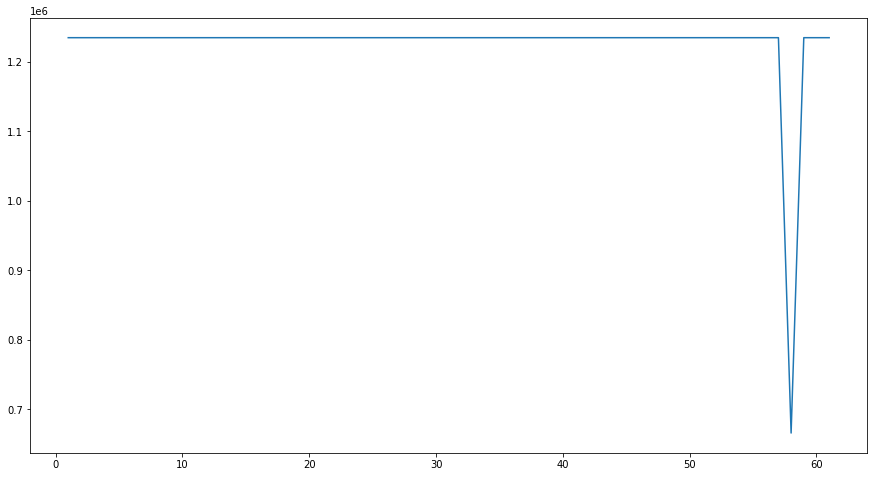

In [14]:
dfaudioKO["FileSize"].plot(figsize=(15, 8))

<AxesSubplot:>

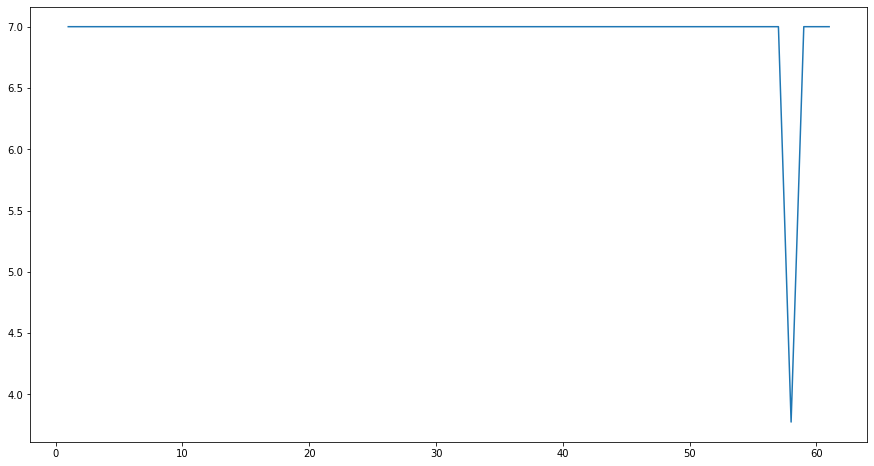

In [15]:
dfaudioKO["Duration"].plot(figsize=(15, 8))

In [16]:
del dfaudio

In [17]:
dfaudio = pd.DataFrame(columns = ["AudioFilePath" , "SubDir", "AudioFile", "CategoryWav", "ModifiedDate", 
                                   "CreationDate", "FileSize", 
                                   "AudioFormat", "BitDepth" , "BitRate", "SamplingRate", 
                                   "NbChannels", "Duration"])

In [18]:
dfaudiocreation('soundssamples/OK')

===== Audio Statistics =====

Audio File:	 soundssamples/OK/machine_OK_1.wav
Modified Date:	 Wed Mar  2 15:07:15 2022
Creation Date:	 Wed Mar  2 15:07:15 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 soundssamples/OK/machine_OK_10.wav
Modified Date:	 Wed Mar  2 15:07:18 2022
Creation Date:	 Wed Mar  2 15:07:18 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 soundssamples/OK/machine_OK_11.wav
Modified Date:	 Wed Mar  2 15:07:18 2022
Creation Date:	 Wed Mar  2 15:07:18 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 soundssamples/OK/machine_OK_12.wav
Modif

===== Audio Statistics =====

Audio File:	 soundssamples/OK/machine_OK_36.wav
Modified Date:	 Wed Mar  2 15:07:25 2022
Creation Date:	 Wed Mar  2 15:07:25 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 soundssamples/OK/machine_OK_37.wav
Modified Date:	 Wed Mar  2 15:07:26 2022
Creation Date:	 Wed Mar  2 15:07:26 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 soundssamples/OK/machine_OK_38.wav
Modified Date:	 Wed Mar  2 15:07:26 2022
Creation Date:	 Wed Mar  2 15:07:26 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 soundssamples/OK/machine_OK_39.wav
Modi

===== Audio Statistics =====

Audio File:	 soundssamples/OK/machine_OK_8.wav
Modified Date:	 Wed Mar  2 15:07:16 2022
Creation Date:	 Wed Mar  2 15:07:16 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0

===== Audio Statistics =====

Audio File:	 soundssamples/OK/machine_OK_9.wav
Modified Date:	 Wed Mar  2 15:07:18 2022
Creation Date:	 Wed Mar  2 15:07:18 2022
File Size:	 1234844
Audio Format:	 WAVEAudioFormat.PCM
Bit Depth:	 16
Bit Rate:	 1411200
Sampling Rate:	 44100
Nb of Channels:	 2
Duration:	 7.0


 ===== Number of files analyzed = 61 =====


In [19]:
dfaudioOK = dfaudio

In [20]:
dfaudioOK.shape

(61, 13)

## All files analysis

In [21]:
print(dfaudioKO.shape)
print(dfaudioOK.shape)

(61, 13)
(61, 13)


In [22]:
dfaudioall = pd.concat([dfaudioKO, dfaudioOK])

In [23]:
dfaudioall.shape

(122, 13)

In [24]:
dfaudioall.head()

,AudioFilePath,SubDir,AudioFile,CategoryWav,ModifiedDate,CreationDate,FileSize,AudioFormat,BitDepth,BitRate,SamplingRate,NbChannels,Duration
1,soundssamples/KO/machine_KO_1.wav,KO,machine_KO_1.wav,KO,Wed Mar 2 15:07:44 2022,Wed Mar 2 15:07:44 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
2,soundssamples/KO/machine_KO_10.wav,KO,machine_KO_10.wav,KO,Wed Mar 2 15:07:48 2022,Wed Mar 2 15:07:48 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
3,soundssamples/KO/machine_KO_11.wav,KO,machine_KO_11.wav,KO,Wed Mar 2 15:07:48 2022,Wed Mar 2 15:07:48 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
4,soundssamples/KO/machine_KO_12.wav,KO,machine_KO_12.wav,KO,Wed Mar 2 15:07:49 2022,Wed Mar 2 15:07:49 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0
5,soundssamples/KO/machine_KO_13.wav,KO,machine_KO_13.wav,KO,Wed Mar 2 15:07:49 2022,Wed Mar 2 15:07:49 2022,1234844,WAVEAudioFormat.PCM,16,1411200.0,44100.0,2,7.0


(61, 13)


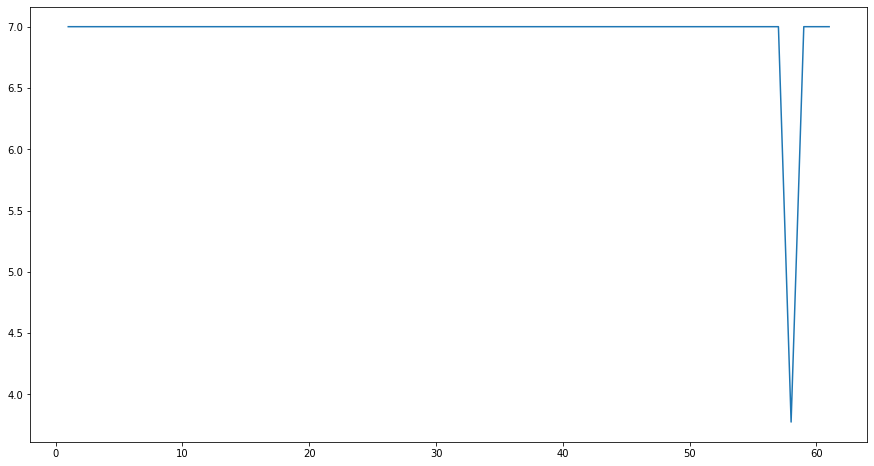

In [25]:
df=dfaudioall[(dfaudioall.SubDir == "KO")]
print(df.shape)
df["Duration"].plot(figsize=(15, 8))
del df

(61, 13)


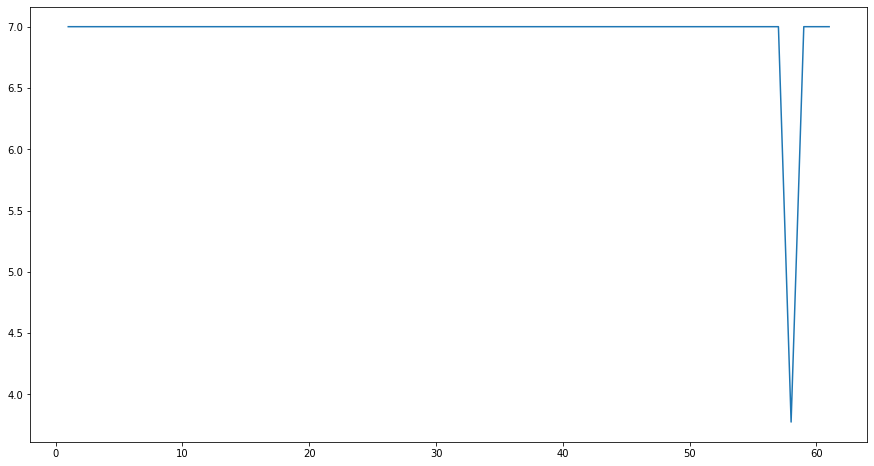

In [26]:
df=dfaudioall[(dfaudioall.SubDir == "OK") & (dfaudioall.Duration > 1)]
print(df.shape)
df["Duration"].plot(figsize=(15, 8))
del df

In [27]:
dfaudioall.to_csv('AudioStatistics.csv')

In [28]:
from IPython.display import FileLink
AUDIOSTATS_LINK = FileLink(path='AudioStatistics.csv')
print("Click to download the file:")
AUDIOSTATS_LINK

Click to download the file:


/mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow9/code/Users/seretkow/Sound/MachineSoundAnomaly/AudioStatistics.csv

> End. You can go to the next notebook